## Dataset 1 - Representations from Vision Transformer

In [1]:
from LogRegClassifier import LogRegClassifier
from KNNClassifier import KNNClassifier
from KMeans import KMeans
import DatasetRun
import Metrics

In [2]:
study_name = "dataset1"
device = DatasetRun.get_device()

Device used: cuda


## Sample run

Using KNNClassifier:

In [3]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=0.5, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and the KNN Classifier
kmeans = KMeans(n_clusters=20, metric=metric_kmeans)
clf = KNNClassifier(n_neighbors=5, 
                    metric=metric, 
                    is_normalization=False, 
                    tukey_lambda=1, 
                    kmeans=kmeans, 
                    device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=True)

task 0: (time: 2.5615s)
FeCAM accuracy: 97.9000; My accuracy: 98.1000
task 1: (time: 2.3574s)
FeCAM accuracy: 94.8500; My accuracy: 95.1000
task 2: (time: 3.4671s)
FeCAM accuracy: 92.3667; My accuracy: 92.4333
task 3: (time: 4.5895s)
FeCAM accuracy: 90.4000; My accuracy: 90.6250
task 4: (time: 6.1472s)
FeCAM accuracy: 89.2800; My accuracy: 89.3800
task 5: (time: 8.4982s)
FeCAM accuracy: 88.3000; My accuracy: 88.4167
task 6: (time: 10.7920s)
FeCAM accuracy: 87.5143; My accuracy: 87.6714
task 7: (time: 13.8249s)
FeCAM accuracy: 86.6000; My accuracy: 86.8000
task 8: (time: 17.1389s)
FeCAM accuracy: 86.5667; My accuracy: 86.8000
task 9: (time: 20.7953s)
FeCAM accuracy: 85.6700; My accuracy: 85.9500


Using LogRegClassifier:

In [5]:
# Define the Classifier metric and the KMeans metric
metric = Metrics.MahalanobisMetric(shrinkage=1, gamma_1=1, gamma_2=0.5, normalization=True)
metric_kmeans = Metrics.EuclideanMetric()

# Initialize KMeans and the Logistic Regression Classifier
kmeans = KMeans(n_clusters=1, metric=metric_kmeans)
clf = LogRegClassifier(n_store=50, 
                       selection_method='random', 
                       metric=metric, 
                       is_normalization=True,
                       tukey_lambda=1, 
                       kmeans=kmeans, 
                       device=device)

# Run the classifier on the dataset
_ = DatasetRun.train(clf=clf, folder_name='../data/dataset1', n_tasks=10, only_last=False, verbose=True)

task 0: (time: 3.8218s)
FeCAM accuracy: 97.9000; My accuracy: 98.0000
task 1: (time: 3.4500s)
FeCAM accuracy: 94.8500; My accuracy: 94.0000
task 2: (time: 4.3223s)
FeCAM accuracy: 92.3667; My accuracy: 91.3000
task 3: (time: 5.3396s)
FeCAM accuracy: 90.4000; My accuracy: 88.4750
task 4: (time: 8.5969s)
FeCAM accuracy: 89.2800; My accuracy: 87.4200
task 5: (time: 8.0883s)
FeCAM accuracy: 88.3000; My accuracy: 85.7667
task 6: (time: 10.4058s)
FeCAM accuracy: 87.5143; My accuracy: 84.7429
task 7: (time: 13.9802s)
FeCAM accuracy: 86.6000; My accuracy: 83.7250
task 8: (time: 17.8600s)
FeCAM accuracy: 86.5667; My accuracy: 83.4000
task 9: (time: 23.0545s)
FeCAM accuracy: 85.6700; My accuracy: 82.1700


## Grid search results

plot accuracy over trials (to check how well did the grid search work)

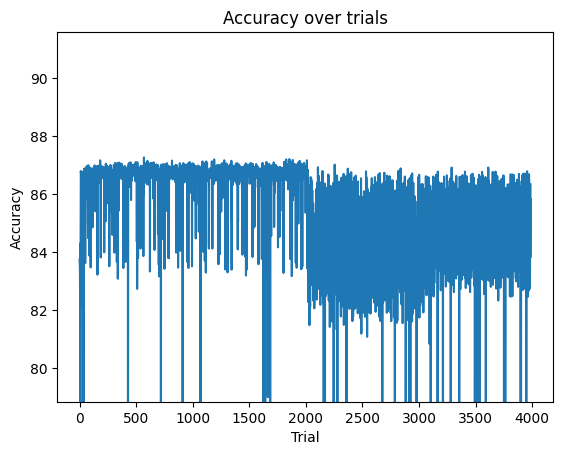

In [3]:
DatasetRun.plot_accuracy_trials(study_name=study_name, path='../results/', ylim=True)

plot accuracies against hyperparameters' values 

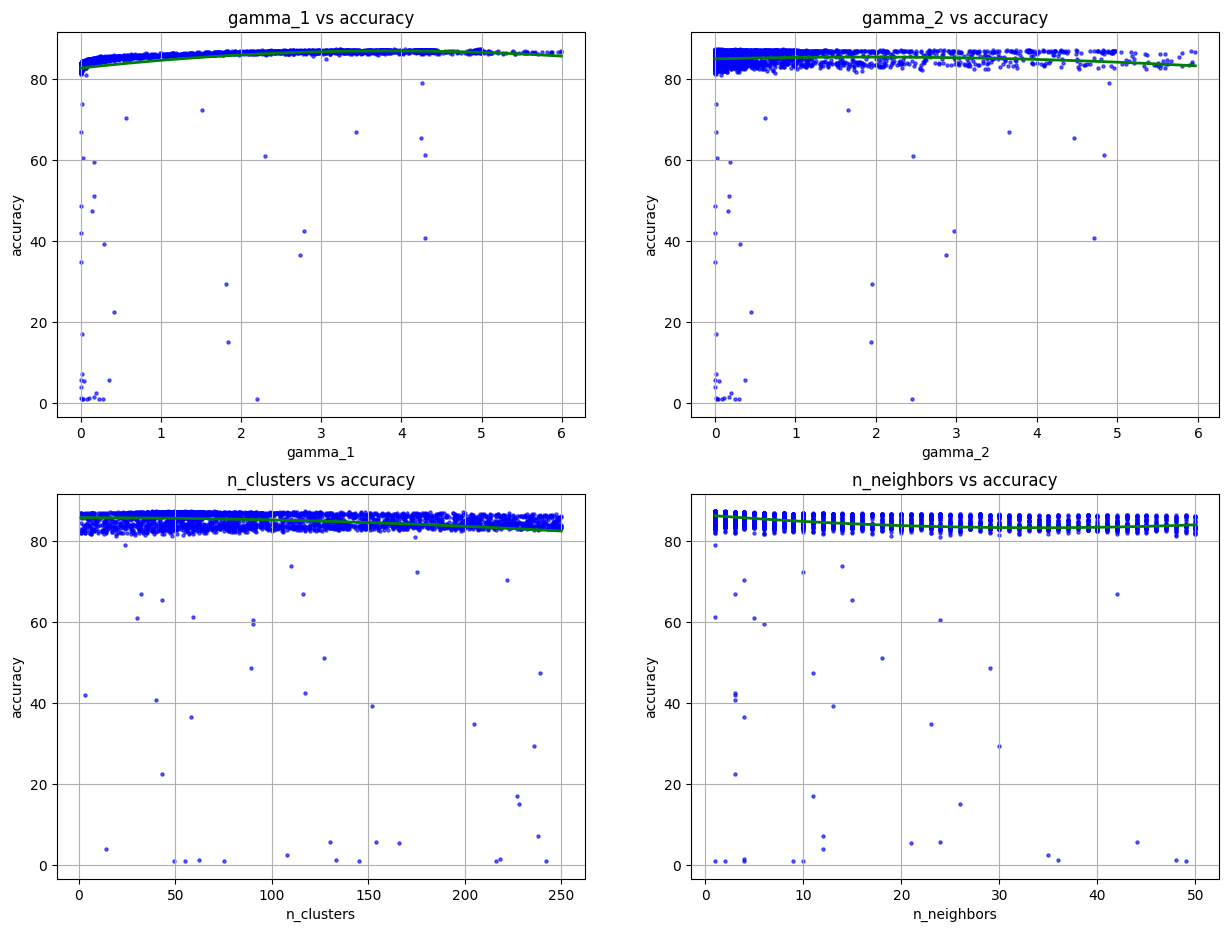

In [4]:
DatasetRun.plot_hyperparameters(study_name, path='../results/', columns=2, deg=2, ylim=False)

display the top hyperparameters

In [5]:
display(DatasetRun.print_results(study_name, path='../results/', only_important=True))

,value,gamma_1,gamma_2,n_clusters,n_neighbors
569,87.26,3.229014,0.310787,58,1
1855,87.20,4.952593,0.087917,38,1
1190,87.19,3.905827,0.005105,46,1
1827,87.19,4.994804,0.024191,49,2
1885,87.17,4.977360,0.057101,117,1
...,...,...,...,...,...
911,1.02,0.273035,0.295938,55,1
1641,1.01,2.192861,2.441110,75,2
2360,1.01,0.070467,0.081732,216,49
3104,1.00,0.017517,0.019225,145,9
